<a href="https://colab.research.google.com/github/amedeotolace/Amedeo_Thesis_2/blob/main/IDS_V5_(LabelEncoder).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Installazione dei package utili***

In [ ]:
# @title Installazione package
!pip install tensorflow
!pip install tensorflow_datasets
!pip install tensorflow tensorflow_decision_forests
!pip install datapackage
!pip install pandas
!pip install keras
!pip install tensorflow numpy scikit-learn
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.1/72.1 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.8/111.8 kB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.7 MB/s eta 0:00:00
  Created wheel for unicodecsv: filename=unicodecsv-0.14.1-py3-none-any.whl size=10745 sha256=84095b80ea534ce610dac089ea10074356df6b5468e6ee129927811aa2743e45
  Stored in directory: /root/.

## ***Caricamento del dataset attraverso Pandas del file .CSV***

In [ ]:
import datapackage
import pandas as pd
"""
data_url = 'https://datahub.io/machine-learning/kddcup99/datapackage.json'

# to load Data Package into storage
package = datapackage.Package(data_url)

# to load only tabular data
resources = package.resources
for resource in resources:
    if resource.tabular:
        dataset_df = pd.read_csv(resource.descriptor['path'])
        #print (dataset_df)
"""
dataset_df = pd.read_csv("drive/MyDrive/kddcup99_csv.csv")
dataset_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


## ***Analisi del dataset***

In [ ]:
def binning_dataset(dataset_df):
  import pandas as pd

  #Creiamo i gruppi per il binning
  gruppi = {
      'back': 'DoS',
      'buffer_overflow': 'U2R',
      'ftp_write': 'R2L',
      'guess_passwd': 'R2L',
      'imap': 'R2L',
      'ipsweep': 'Probe',
      'land': 'DoS',
      'loadmodule': 'U2R',
      'multihop': 'R2L',
      'neptune': 'DoS',
      'nmap': 'Probe',
      'normal': 'Normal',
      'perl': 'U2R',
      'phf': 'R2L',
      'pod': 'DoS',
      'portsweep': 'Probe',
      'rootkit': 'U2R',
      'satan': 'Probe',
      'smurf': 'DoS',
      'spy': 'R2L',
      'teardrop': 'DoS',
      'warezclient': 'R2L',
      'warezmaster': 'R2L'
  }

  # Applichiamo il binning utilizzando la funzione map di pandas
  dataset_df['categorie_binned'] = dataset_df['label'].map(gruppi)

  #dataset_df['categorie_binned'].value_counts()

print("="*200)
print("Eseguo il binning del dataset di train")
binning_dataset(dataset_df)
dataset_df['categorie_binned'].value_counts()

Eseguo il binning del dataset di train


DoS       391458
Normal     97277
Probe       4107
R2L         1126
U2R           52
Name: categorie_binned, dtype: int64

In [ ]:
dataset_df['label'].value_counts()

smurf              280790
neptune            107201
normal              97277
back                 2203
satan                1589
ipsweep              1247
portsweep            1040
warezclient          1020
teardrop              979
pod                   264
nmap                  231
guess_passwd           53
buffer_overflow        30
land                   21
warezmaster            20
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: label, dtype: int64

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

ENCODING = 'utf-8'

def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v, round(100 * (s[v] / t), 2)))
    return "[{}]".format(",".join(result))

def analyze2(dataset_df):
    cols = dataset_df.columns.values
    #print(cols)
    total = float(len(dataset_df))
    #print(total)
    #print()

    print('Numero di features:', dataset_df.shape[1])
    print('='*40)
    output = dataset_df['label'].values
    labels = set(output)
    #print('Tipologia di output differenti:', labels)
    print('Tipologia di output differenti:')
    for label in labels:
        print(label)
    print('='*250)
    print('Numero di differenti output:', len(labels))

    # Verifico se ci sono valori nulli all'interno del dataset
    #null_values = len(dataset_df[dataset_df.isnull().any(axis=1)])
    #print('=' * 50)
    #print("Numero di valori null:", null_values, " all'interno del dataset")

    # Controllo eventuali valori duplicati
    print('=' * 50)
    #print("Elimino eventuali valori duplicati")
    #dataset_df.drop_duplicates(keep='first', inplace=True)
    df_val_duplicati = dataset_df.drop_duplicates(keep='first')
    print("I valori duplicati eliminati sono ", len(df_val_duplicati))

    #Verifico se ci sono valori nulli all'interno del dataset
    print('='*50)
    print("Numero di valori null:",len(dataset_df[dataset_df.isnull().any(axis=1)])," all'interno del dataset")

    #Elimino eventuali valori nulli
    #print('='*50)
    #print("Elimino eventuali valori nulli")
    #dataset_df.dropna(inplace = True)

    #Analizzo la lunghezza del dataset
    print('='*50)
    print("Vi sono {} righe.".format(len(dataset_df)))

    #Effettuo un'analisi esplorativa dei dati, analizzando quanti valori trovo per un determinato tipo di attacco
    print('='*50)

    print()
    cols = dataset_df.columns.values
    total = float(len(dataset_df))

    print("{} rows".format(int(total)))

    # Sorting the columns based on the percentage of unique values in descending order
    sorted_data = sorted(cols, key=lambda x: len(dataset_df[x].unique()) / total, reverse=True)

    # Create a list of dictionaries to store the results
    results = []

    """
    for col in sorted_data:
        uniques = dataset_df[col].unique()
        unique_count = len(uniques)
        if unique_count > 100:
            result = {"Column": col, "Unique Count": unique_count, "Percentage": int((unique_count / total) * 100)}
            results.append(result)
        else:
            result = {"Column": col, "Categories": expand_categories(dataset_df[col])}
            results.append(result)
    """

    for col in sorted_data:
        uniques = dataset_df[col].unique()
        unique_count = len(uniques)
        result = {"Column": col,"Unique Count": unique_count,"Categories": expand_categories(dataset_df[col])}
        results.append(result)

    # Create a DataFrame from the list of dictionaries
    results_df = pd.DataFrame(results)
    return results_df

def crea_test_set(dataset_df):
    df_val_duplicati = dataset_df.drop_duplicates(keep='first')
    return df_val_duplicati

In [ ]:
#df_val_duplicati = pd.DataFrame()
#Analizzo il dataset di train
print("="*250)
print("Stampo l'analisi del dataset di train")
results_df = analyze2(dataset_df)
df_val_duplicati = crea_test_set(dataset_df)

Stampo l'analisi del dataset di train
Numero di features: 43
Tipologia di output differenti:
spy
portsweep
phf
ftp_write
buffer_overflow
warezclient
nmap
rootkit
imap
loadmodule
perl
normal
guess_passwd
pod
multihop
land
teardrop
neptune
smurf
ipsweep
back
warezmaster
satan
Numero di differenti output: 23
I valori duplicati eliminati sono  145585
Numero di valori null: 0  all'interno del dataset
Vi sono 494020 righe.

494020 rows


In [ ]:
results_df

,Column,Unique Count,Categories
0,dst_bytes,10725,"[0:82.64%,105:0.9%,147:0.51%,146:0.46%,8314:0...."
1,src_bytes,3300,"[1032:46.16%,0:23.35%,520:10.68%,105:1.49%,147..."
2,duration,2495,"[0:97.5%,1:0.5%,2:0.18%,3:0.13%,5:0.11%,2630:0..."
3,count,490,"[511:46.13%,1:7.94%,510:5.38%,2:2.27%,3:1.18%,..."
4,srv_count,470,"[511:45.86%,1:7.49%,510:5.44%,2:3.82%,3:2.28%,..."
5,dst_host_count,256,"[255:87.61%,1:0.58%,2:0.41%,3:0.29%,4:0.27%,5:..."
6,dst_host_srv_count,256,"[255:68.37%,1:2.41%,2:1.47%,3:1.19%,11:1.14%,8..."
7,dst_host_same_srv_rate,101,"[1.0:70.41%,0.04:3.26%,0.02:3.21%,0.05:3.12%,0..."
8,dst_host_diff_srv_rate,101,"[0.0:70.25%,0.07:9.3%,0.06:5.71%,0.05:3.74%,0...."
9,dst_host_same_src_port_rate,101,"[1.0:58.48%,0.0:28.92%,0.01:4.44%,0.02:1.46%,0..."


In [ ]:
df_val_duplicati

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,categorie_binned
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal,Normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal,Normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal,Normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal,Normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal,Normal
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal,Normal
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal,Normal
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal,Normal


In [ ]:
dataset_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494020.000000,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,...,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000
mean,47.979400,3.025616e+03,8.685308e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148245,0.010212,...,232.471248,188.666052,0.753781,0.030906,0.601936,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.747185,9.882191e+05,3.304003e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355343,1.798328,...,64.744601,106.040205,0.410780,0.109259,0.481309,0.042133,0.380593,0.380920,0.230590,0.230141
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
dataset_df['categorie_binned'].value_counts()

DoS       391458
Normal     97277
Probe       4107
R2L         1126
U2R           52
Name: categorie_binned, dtype: int64

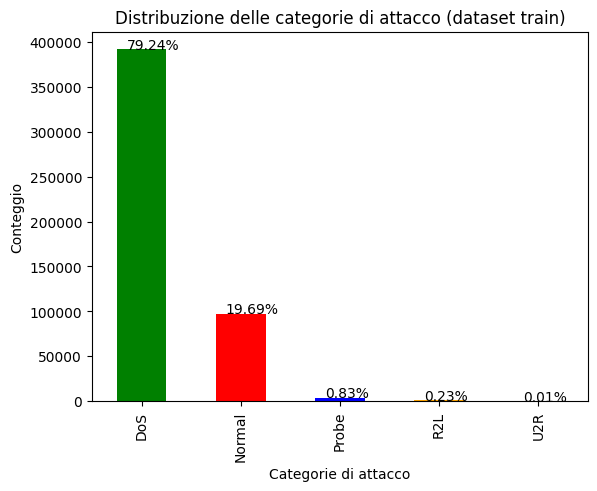

In [ ]:
conteggio_valori = dataset_df['categorie_binned'].value_counts()
conteggio_valori.plot(kind='bar', color=['green', 'red', 'blue', 'orange', 'purple'])

# Aggiungiamo etichette e titoli
plt.xlabel('Categorie di attacco')
plt.ylabel('Conteggio')
plt.title('Distribuzione delle categorie di attacco (dataset train)')


conteggi_percentuali = dataset_df['categorie_binned'].value_counts(normalize=True) * 100

for i, v in enumerate(dataset_df['categorie_binned'].value_counts()):
    plt.text(i - 0.15, v + 0.5, f'{conteggi_percentuali[i]:.2f}%', color='black', fontweight='normal')

# Visualizziamo il grafico
plt.show()
#Diagramma a torte

Eseguendo un raggruppamento sulle tipologie di attacco, si è evidenziato una maggiore quantità di record relativi agli attacchi di tipo DoS, rispetto alle altre tipologie.

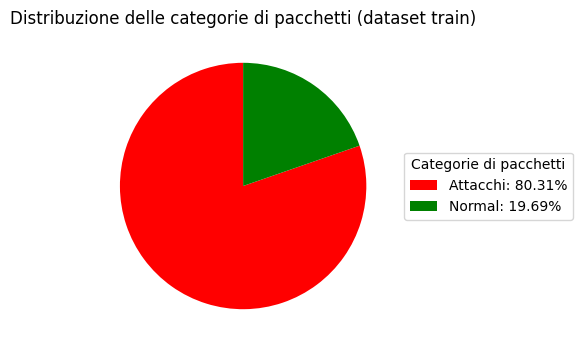

In [ ]:
import matplotlib.pyplot as plt

dataset_df['grouped_categories'] = dataset_df['categorie_binned'].apply(lambda x: 'Normal' if x == 'Normal' else 'Attacchi')

conteggio_valori = dataset_df['grouped_categories'].value_counts()

plt.figure(figsize=(4, 4))
wedges, texts, autotexts = plt.pie(conteggio_valori, labels=None, autopct='',
                                   textprops=dict(size=10), colors=['red', 'green'], startangle=90,
                                   labeldistance=1.5)

plt.title('Distribuzione delle categorie di pacchetti (dataset train)')

legend_labels = [f'{label}: {percentage:.2f}%' for label, percentage in zip(conteggio_valori.index, (conteggio_valori / conteggio_valori.sum()) * 100)]
plt.legend(wedges, legend_labels, title='Categorie di pacchetti', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


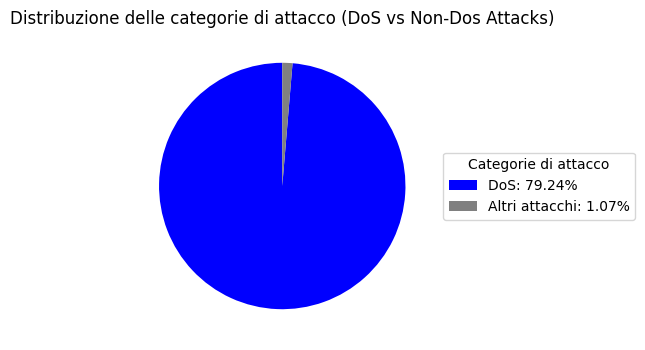

In [ ]:
import matplotlib.pyplot as plt

# Filtra i pacchetti 'Normal' e 'DoS'
non_dos_df = dataset_df[~dataset_df['categorie_binned'].isin(['Normal'])]

conteggio_valori = non_dos_df['categorie_binned'].value_counts()
valori_dos = {'DoS': conteggio_valori.pop('DoS')}
# Plot the pie chart
plt.figure(figsize=(8, 4))

# Calculate the percentage for 'DoS'
percentage_dos = valori_dos['DoS']/ dataset_df.shape[0] * 100

#Calcola percentuale di attacchi Non Dos
percentage_non_dos = conteggio_valori / dataset_df.shape[0] * 100

#percentage_non_dos.pop('DoS')
#print(percentage_non_dos)
#attacchi_non_DoS = percentage_non_dos.sum()
#print(attacchi_non_DoS)
#print(type(percentage_non_dos))

#colors =plt.cm.viridis(percentage_non_dos)

wedges_combined, _, autotexts_combined = plt.pie([valori_dos['DoS'], conteggio_valori.sum()], autopct='',
                                                 textprops=dict(size=10), colors=['blue','grey'],
                                                 startangle=90)

# Create labels for both 'DoS' and 'Non-Dos Attacks'
labels_combined = [f'DoS: {percentage_dos.sum():.2f}%'] + [f'Altri attacchi: {percentage_non_dos.sum():.2f}%']

plt.title('Distribuzione delle categorie di attacco (DoS vs Non-Dos Attacks)')

# Posiziona la legenda in alto a destra
plt.legend(wedges_combined, labels_combined, title='Categorie di attacco',
           loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

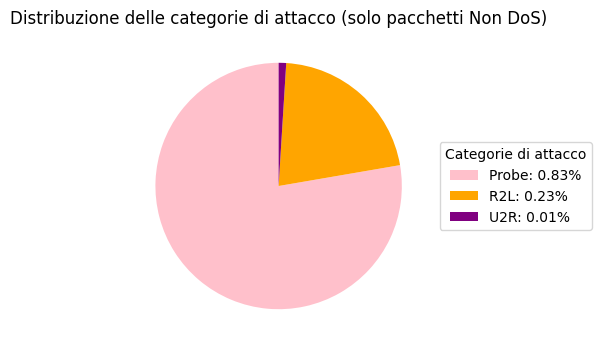

In [ ]:
import matplotlib.pyplot as plt

# Filtra i pacchetti 'Normal' e 'DoS'
non_dos_df = dataset_df[~dataset_df['categorie_binned'].isin(['Normal', 'DoS'])]

# Conta i valori relativi alle categorie di attacco (solo pacchetti 'Non Normal' e 'Non DoS')
conteggio_valori = non_dos_df['categorie_binned'].value_counts()

# Plot the pie chart
plt.figure(figsize=(4, 4))
wedges, texts, autotexts = plt.pie(conteggio_valori, labels=None, autopct='',
                                   textprops=dict(size=10), colors=['pink', 'orange', 'purple'], startangle=90,
                                   labeldistance=1.5)

plt.title('Distribuzione delle categorie di attacco (solo pacchetti Non DoS)')

# Calcola le percentuali rispetto al dataset totale
percentages = conteggio_valori / dataset_df.shape[0] * 100

# Crea una legenda con la percentuale delle diverse label e i relativi colori associati
legend_labels = [f'{label}: {percentage:.2f}%' for label, percentage in zip(conteggio_valori.index, percentages)]
plt.legend(wedges, legend_labels, title='Categorie di attacco', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


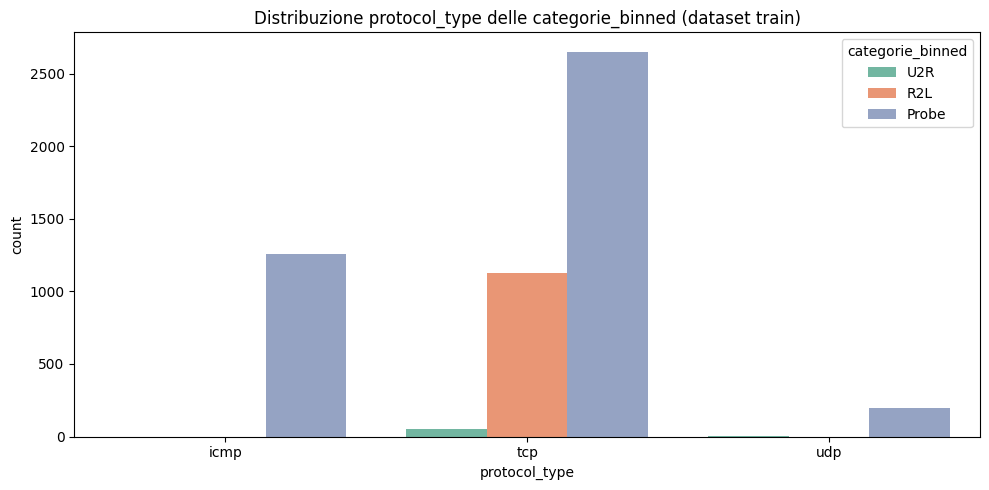

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = dataset_df.select_dtypes(include='number').columns
#symbolic_columns = ['protocol_type', 'flag']

custom_palette = sns.color_palette("Set2", 3)  # Puoi scegliere una palette diversa a tuo piacimento

plt.figure(figsize=(10, 5))

sorted_counts = dataset_df['protocol_type'].value_counts().sort_values(ascending=False)
# Filter out 'Normal' category before plotting
sns.countplot(x='protocol_type', hue='categorie_binned', data=dataset_df[(dataset_df['categorie_binned'] != 'Normal') & (dataset_df['categorie_binned'] != 'DoS')],
                      order=sorted_counts.index, palette=custom_palette)
plt.title(f'Distribuzione protocol_type delle categorie_binned (dataset train)')

plt.tight_layout()
plt.show()


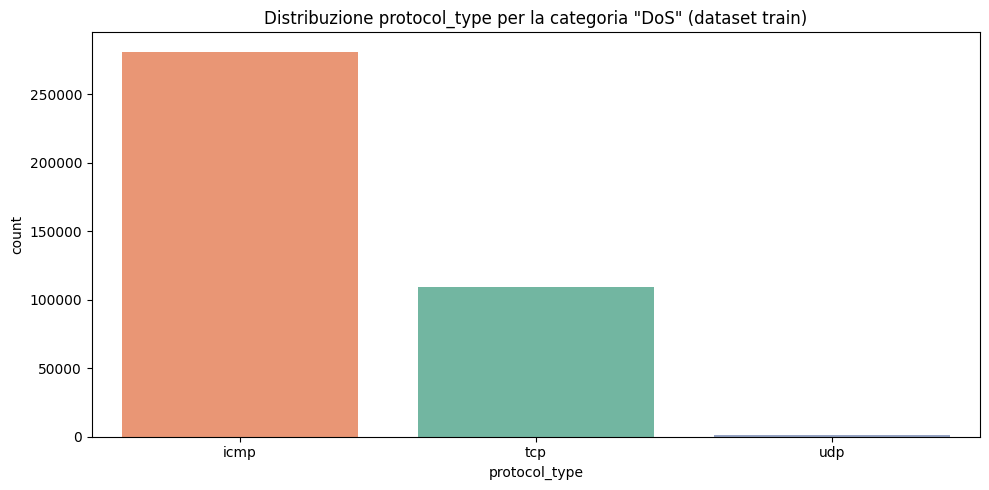

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleziona solo le colonne di tipo numerico per il grafico di dispersione
numeric_columns = dataset_df.select_dtypes(include='number').columns

custom_palette = sns.color_palette("Set2", n_colors=3)

plt.figure(figsize=(10, 5))

# Filtra solo per la categoria 'DoS'
dos_df = dataset_df[dataset_df['categorie_binned'] == 'DoS']

sorted_counts = dos_df['protocol_type'].value_counts().sort_values(ascending=False)

# Plot
sns.countplot(x='protocol_type', data=dos_df, order=sorted_counts.index, palette=custom_palette, hue='protocol_type', legend=False)
plt.title(f'Distribuzione protocol_type per la categoria "DoS" (dataset train)')

plt.tight_layout()
plt.show()


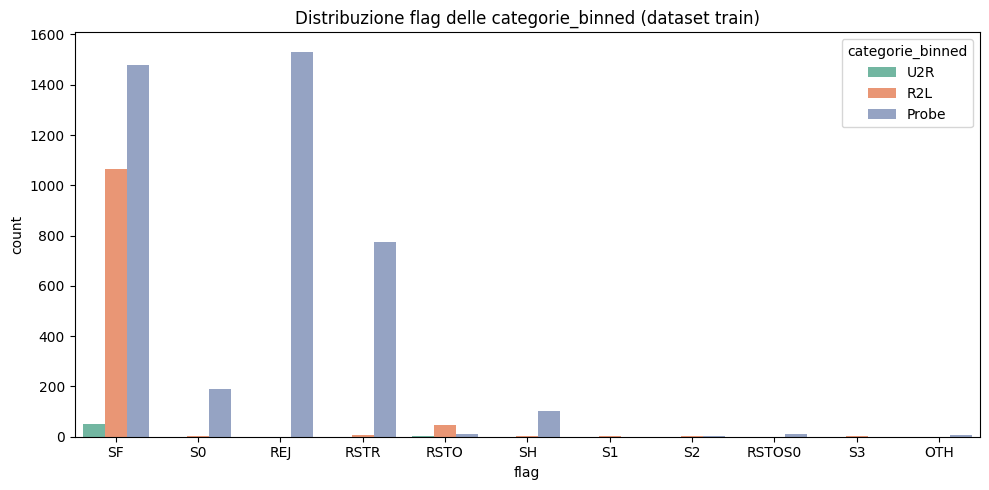

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = dataset_df.select_dtypes(include='number').columns
#symbolic_columns = ['protocol_type', 'flag']

custom_palette = sns.color_palette("Set2", 3)  # Puoi scegliere una palette diversa a tuo piacimento

plt.figure(figsize=(10, 5))

sorted_counts = dataset_df['flag'].value_counts().sort_values(ascending=False)
# Filter out 'Normal' category before plotting
sns.countplot(x='flag', hue='categorie_binned', data=dataset_df[(dataset_df['categorie_binned'] != 'Normal') & (dataset_df['categorie_binned'] != 'DoS')],
                      order=sorted_counts.index, palette=custom_palette, legend=True)
plt.title(f'Distribuzione flag delle categorie_binned (dataset train)')

plt.tight_layout()
plt.show()

<Figure size 2500x800 with 0 Axes>

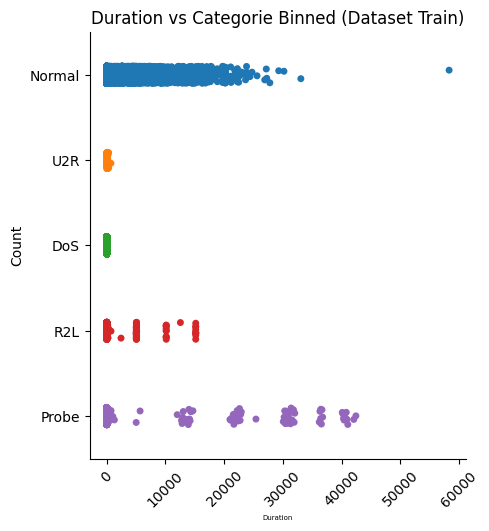

In [ ]:
plt.figure(figsize=(25, 8))
sns.catplot(data=dataset_df, x='duration', y='categorie_binned',hue='categorie_binned')
plt.title('Duration vs Categorie Binned (Dataset Train)')
plt.xlabel('Duration', fontsize=5)
plt.ylabel('Count')
plt.xticks(rotation=45)
#plt.legend(title='Categorie Binned')
plt.show()

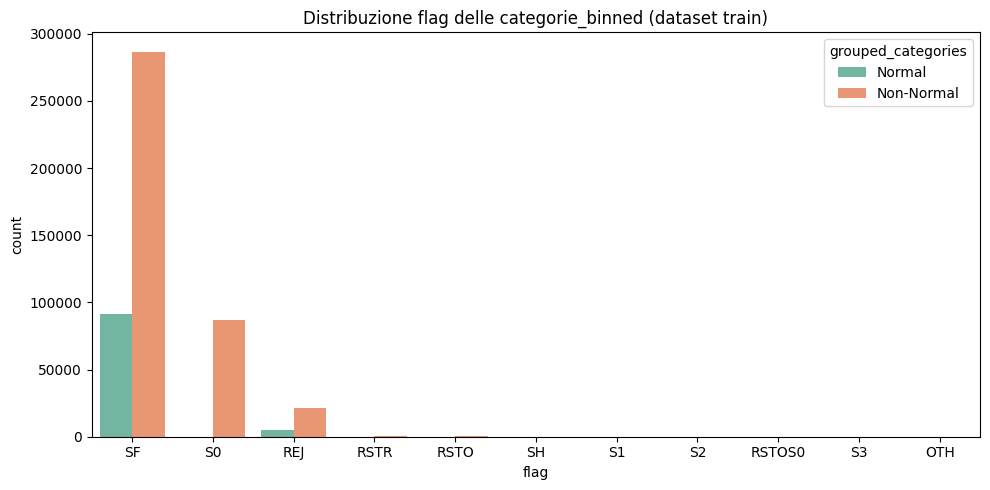

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#symbolic_columns = ['protocol_type', 'flag']

custom_palette = sns.color_palette("Set2", 2)  # Puoi scegliere una palette diversa a tuo piacimento

plt.figure(figsize=(10, 5))

# Create a new column 'grouped_categories' based on 'categorie_binned'
dataset_df['grouped_categories'] = dataset_df['categorie_binned'].apply(lambda x: 'Non-Normal' if x != 'Normal' else x)

sorted_counts = dataset_df['flag'].value_counts().sort_values(ascending=False)

# Filter out 'Normal' and 'DoS' categories before plotting
sns.countplot(x='flag', hue='grouped_categories', data=dataset_df,
              order=sorted_counts.index, palette=custom_palette)
plt.title(f'Distribuzione flag delle categorie_binned (dataset train)')

plt.tight_layout()
plt.show()

# ***Feature più importanti***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = dataset_df.drop(['label','protocol_type','service','flag','land','logged_in',
                'is_host_login','is_guest_login','categorie_binned','grouped_categories'], axis=1)
y = dataset_df['label']

model = RandomForestClassifier()
model.fit(X, y)

feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

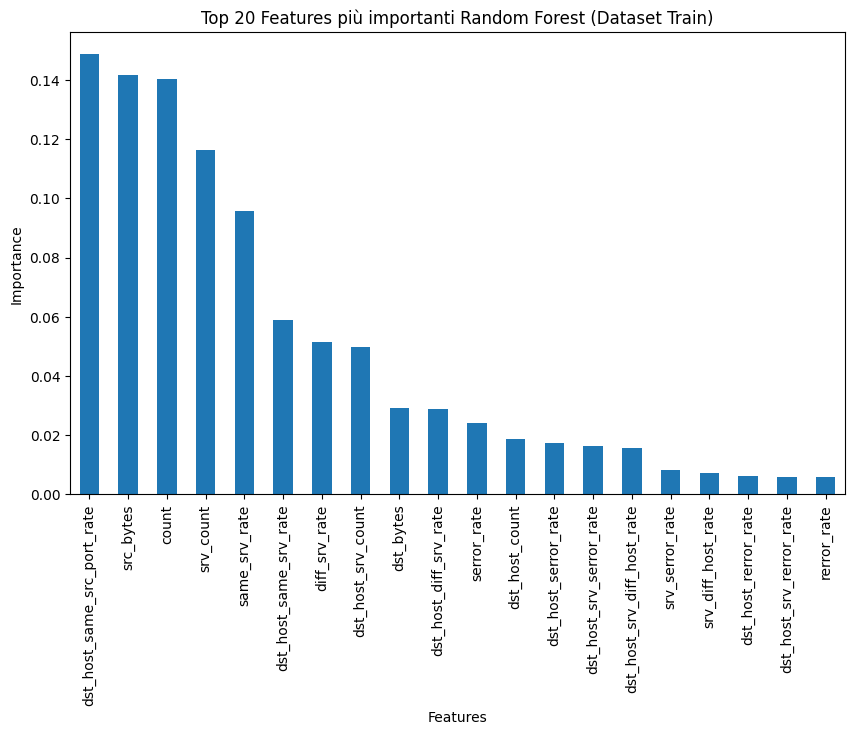

In [ ]:
# Select only the top 20 features
top_features = feature_importance.head(20)

# Plot the top 20 feature importances
plt.figure(figsize=(10, 6))
top_features.plot(kind='bar')
plt.title('Top 20 Features più importanti Random Forest (Dataset Train)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# ***Data points per attacco***

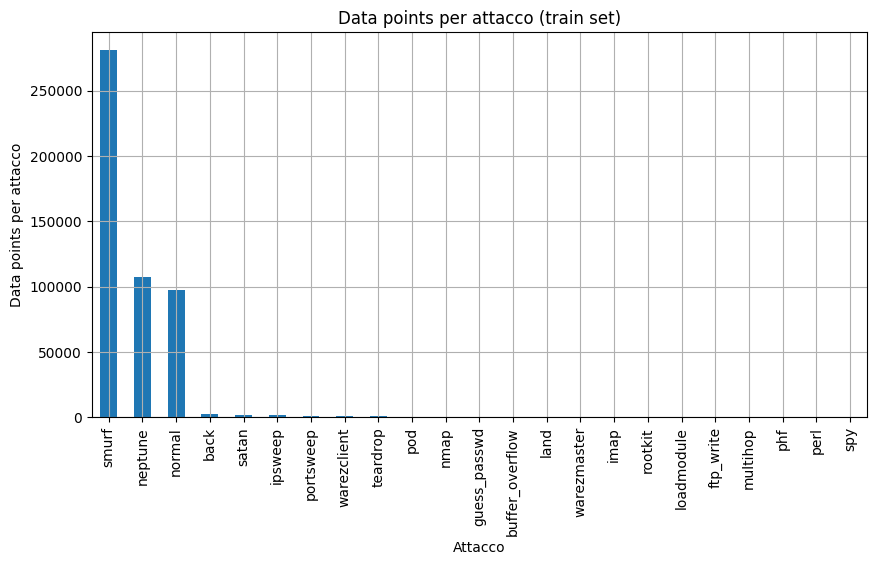

In [ ]:
plt.figure(figsize=(10,5))
class_distribution = dataset_df['label'].value_counts()
class_distribution.plot(kind='bar')
plt.title('Data points per attacco (train set)')
plt.xlabel('Attacco')
plt.ylabel('Data points per attacco')
plt.grid()
plt.show()

In [ ]:
df_test = dataset_df[['label','duration']]
df_test = df_test.rename(columns={'duration':'conteggio'})

In [ ]:
df_test.groupby('label').count().sort_values(by='conteggio', ascending=False)
#Diagrammi a torte

,conteggio
label,
smurf,280790
neptune,107201
normal,97277
back,2203
satan,1589
ipsweep,1247
portsweep,1040
warezclient,1020
teardrop,979


In [ ]:
df_test = dataset_df[['categorie_binned','duration']]
df_test = df_test.rename(columns={'duration':'conteggio'})
#pd.DataFrame(dataset_df.groupby('categorie_binned')['categorie_binned'].count().sort_values(ascending=False))
#Diagrammi a torte

In [ ]:
df_test.groupby('categorie_binned').count().sort_values(by='conteggio', ascending=False)

,conteggio
categorie_binned,
DoS,391458
Normal,97277
Probe,4107
R2L,1126
U2R,52


# ***Creazione dell'NDAE con categorie_binned:***




In [ ]:
print(dataset_df.shape)

(494020, 44)


In [ ]:
# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Elimino eventuali valori duplicati
#dataset_df.drop_duplicates(keep='first', inplace=True)

train_df, test_df = train_test_split(dataset_df, test_size=0.592, random_state=42)

# Applica z-score solo alle colonne numeriche
for name in dataset_df.columns:
    if name not in ['protocol_type','service','flag','land','logged_in',
                    'is_host_login','is_guest_login', 'label', 'grouped_categories','categorie_binned']:
        encode_numeric_zscore(dataset_df, name)

train_df.dropna(inplace=True,axis=1)
train_df.dropna(inplace=True, axis=0)

x_columns = train_df.columns.drop('categorie_binned')
x = train_df[x_columns].values
# Applica Label Encoding alle colonne categoriche
label_columns = ['protocol_type','service','flag','land','logged_in',
                'is_host_login','is_guest_login', 'label', 'grouped_categories']

label_encoder = LabelEncoder()
for col in label_columns:
    train_df[col] = label_encoder.fit_transform(train_df[col])

# Converti in numpy - Classification
#x_columns = dataset_df.columns.drop('categorie_binned')
#x = dataset_df[x_columns].values
#y = dataset_df['categorie_binned'].values

#dataset_df.columns.drop('grouped_categories')
#x_columns = dataset_df.columns.drop('categorie_binned')
#x = dataset_df[x_columns].values
#y = label_encoder.fit_transform(dataset_df['categorie_binned'].values) # Classification

#outcomes = dummies.columns
#num_classes = len(outcomes)
#y = dummies.values

train_df.columns.drop('grouped_categories')
x_columns = train_df.columns.drop('categorie_binned')
x = train_df[x_columns].values
y = label_encoder.fit_transform(train_df['categorie_binned'].values) # Classification

# Split del dataset in training e test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42, shuffle=True)
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, train_size=0.60, random_state=42, shuffle=True)

In [ ]:
print(dataset_df.shape)
print(y)
print(np.unique(y))

(494020, 44)
[0 0 0 ... 0 1 0]
[0 1 2 3 4]


In [ ]:
#dataset_df.to_excel('test_lencoding.xlsx')

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Creazione di un autoencoder non simmetrico con attivazioni sigmoid
model = Sequential(name="S-NDAE")

# Encoder
#model.add(Dense(41, activation='sigmoid'))
model.add(Dense(14, activation='sigmoid'))
model.add(Dense(28, activation='sigmoid'))
model.add(Dense(28, activation='sigmoid'))

model.add(Dense(14, activation='sigmoid'))
model.add(Dense(28, activation='sigmoid'))
model.add(Dense(28, activation='sigmoid'))

# Aggiunta del classificatore finale per la classificazione multiclasse
num_classes = len(dataset_df['categorie_binned'].unique())  # Calcola il numero di classi nel tuo dataset
#num_classes = np.unique(y)
model.add(Dense(num_classes, activation='softmax'))

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3,
                        patience=5, verbose=1, mode='auto',
                      restore_best_weights=True)

# Compilazione del modello
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# One-hot encoding delle etichette per la classificazione multiclasse
#y = pd.get_dummies(dataset_df['categorie_binned']).values

# Addestramento dell'autoencoder
history = model.fit(x_train, y_train, epochs=1000, validation_data=(x_test, y_test), verbose=2, callbacks=[monitor])
#history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=2, callbacks=[monitor])

Epoch 1/1000
5669/5669 - 13s - loss: 0.1207 - accuracy: 0.9623 - val_loss: 0.0421 - val_accuracy: 0.9879 - 13s/epoch - 2ms/step
Epoch 2/1000
5669/5669 - 12s - loss: 0.0348 - accuracy: 0.9897 - val_loss: 0.0293 - val_accuracy: 0.9905 - 12s/epoch - 2ms/step
Epoch 3/1000
5669/5669 - 12s - loss: 0.0355 - accuracy: 0.9897 - val_loss: 0.0341 - val_accuracy: 0.9907 - 12s/epoch - 2ms/step
Epoch 4/1000
5669/5669 - 12s - loss: 0.0351 - accuracy: 0.9900 - val_loss: 0.0262 - val_accuracy: 0.9910 - 12s/epoch - 2ms/step
Epoch 5/1000
5669/5669 - 11s - loss: 0.0328 - accuracy: 0.9907 - val_loss: 0.0259 - val_accuracy: 0.9919 - 11s/epoch - 2ms/step
Epoch 6/1000
5669/5669 - 11s - loss: 0.0253 - accuracy: 0.9915 - val_loss: 0.0232 - val_accuracy: 0.9925 - 11s/epoch - 2ms/step
Epoch 7/1000
5669/5669 - 11s - loss: 0.0245 - accuracy: 0.9916 - val_loss: 0.0215 - val_accuracy: 0.9926 - 11s/epoch - 2ms/step
Epoch 8/1000
5669/5669 - 12s - loss: 0.0262 - accuracy: 0.9913 - val_loss: 0.0212 - val_accuracy: 0.9925

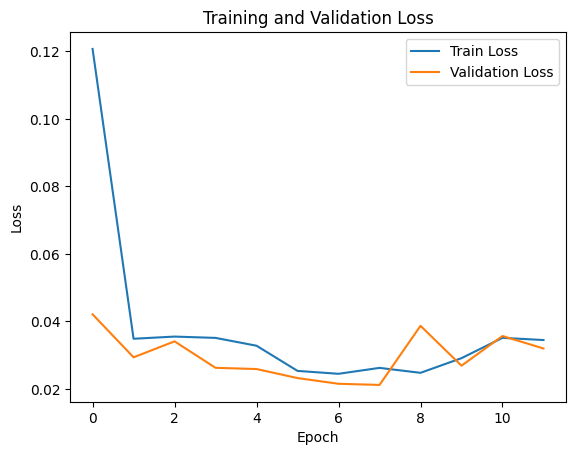

In [ ]:
# Plot loss durante l'addestramento
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

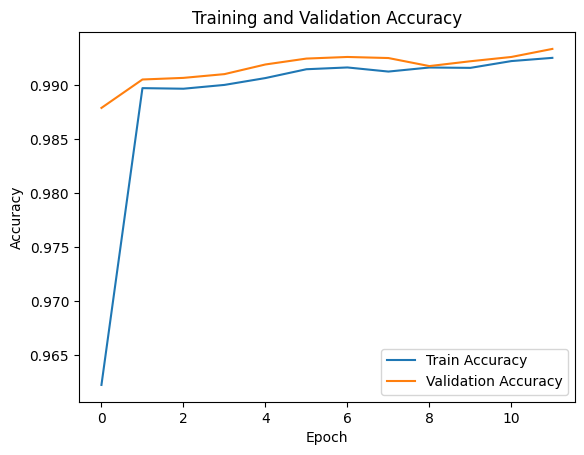

In [ ]:
# Plot accuratezza durante l'addestramento
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Estrazione delle feature latenti (encoder)
#encoder_layers = model.layers[:3]  # Estrai gli strati corrispondenti all'encoder
encoder_layers = model.layers
encoder = Sequential(encoder_layers)

# Estrai le feature latenti
encoded_features_train = encoder.predict(x_train)
encoded_features_test = encoder.predict(x_test)

# Addestramento di un classificatore Random Forest sulle feature latenti
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(encoded_features_train, y_train)

# Valutazione del classificatore
y_pred = classifier.predict(encoded_features_test)

# Calcola le metriche senza specificare l'argomento 'average'
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Stampa i risultati
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Summary of the model structure.
model.summary()

# Export the model to a SavedModel.
model.save("project/model")

#print(f'Accuracy of Random Forest classifier on encoded features: {accuracy}')

630/630 [==============================] - 1s 2ms/step
Accuracy: 0.9929
Precision: 0.9931
Recall: 0.9929
F1 Score: 0.9927
Model: "S-NDAE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                616       
                                                                 
 dense_1 (Dense)             (None, 28)                420       
                                                                 
 dense_2 (Dense)             (None, 28)                812       
                                                                 
 dense_3 (Dense)             (None, 14)                406       
                                                                 
 dense_4 (Dense)             (None, 28)                420       
                                                                 
 dense_5 (Dense)             (None, 28)                812       
    

In [ ]:
!pip install pydot
!pip install graphviz

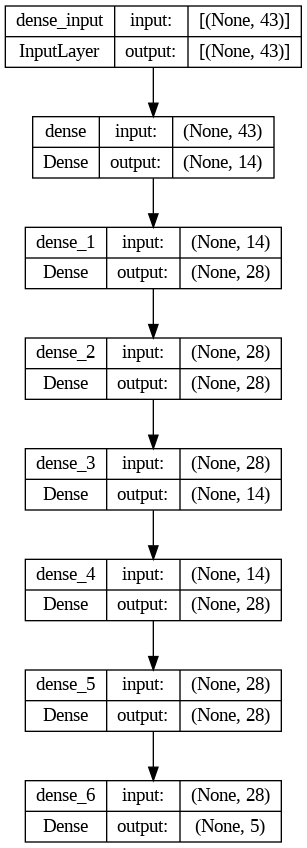

In [ ]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Salva il diagramma del modello in un file immagine
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
import seaborn as sns
import datetime as dt

def confusion_matrix_func(y_test, y_test_pred):

    '''
    This function computes the confusion matrix using Predicted and Actual values and plots a confusion matrix heatmap
    '''
    # Calcola la confusion matrix
    C = confusion_matrix(y_test, y_test_pred)

    cm_df = pd.DataFrame(C)
    labels = ['Normal','DoS','Probe','R2L','U2R']
    plt.figure(figsize=(10,7))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')

    plt.show()

In [ ]:
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Carica il modello precedentemente salvato
model_path = "project/model"
loaded_model = load_model(model_path)

# Supponendo che 'categorie_binned' sia la variabile di destinazione
y_val = test_df['categorie_binned']

# Rimuovi la variabile di destinazione dal dataframe di input
x_val = test_df.drop('categorie_binned', axis=1)

# Assicurati che x_val abbia la stessa formattazione e trasformazioni applicate come durante l'addestramento
# Ad esempio, applica normalizzazione o encoding se necessario
label_encoder_x = LabelEncoder()
x_val_encoded = x_val.apply(lambda col: label_encoder_x.fit_transform(col) if col.dtype == 'O' else col)

# Effettua la codifica delle etichette se necessario (usando lo stesso LabelEncoder utilizzato durante l'addestramento)
label_encoder_y = LabelEncoder()
y_val_encoded = label_encoder_y.fit_transform(y_val)

# Valutazione del modello
y_val_pred_nn = loaded_model.predict(x_val_encoded)

#Inserimento di un classificatore Random Forest
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Addestramento del classificatore Random Forest sulle predizioni del modello neurale
random_forest_classifier.fit(y_val_pred_nn, y_val_encoded)

# Valutazione del modello Random Forest
y_val_pred_rf = random_forest_classifier.predict(y_val_pred_nn)

# Calcola le metriche di valutazione per il modello Random Forest
accuracy_rf = accuracy_score(y_val_encoded, y_val_pred_rf)
precision_rf = precision_score(y_val_encoded, y_val_pred_rf, average='weighted', zero_division=1)
recall_rf = recall_score(y_val_encoded, y_val_pred_rf, average='weighted')
f1_rf = f1_score(y_val_encoded, y_val_pred_rf, average='weighted')

# Stampa i risultati per il modello Random Forest
print("Random Forest Metrics:")
print(f'Accuracy: {accuracy_rf:.4f}')
print(f'Precision: {precision_rf:.4f}')
print(f'Recall: {recall_rf:.4f}')
print(f'F1 Score: {f1_rf:.4f}')

9140/9140 [==============================] - 20s 2ms/step
Random Forest Metrics:
Accuracy: 0.9940
Precision: 0.9942
Recall: 0.9940
F1 Score: 0.9939


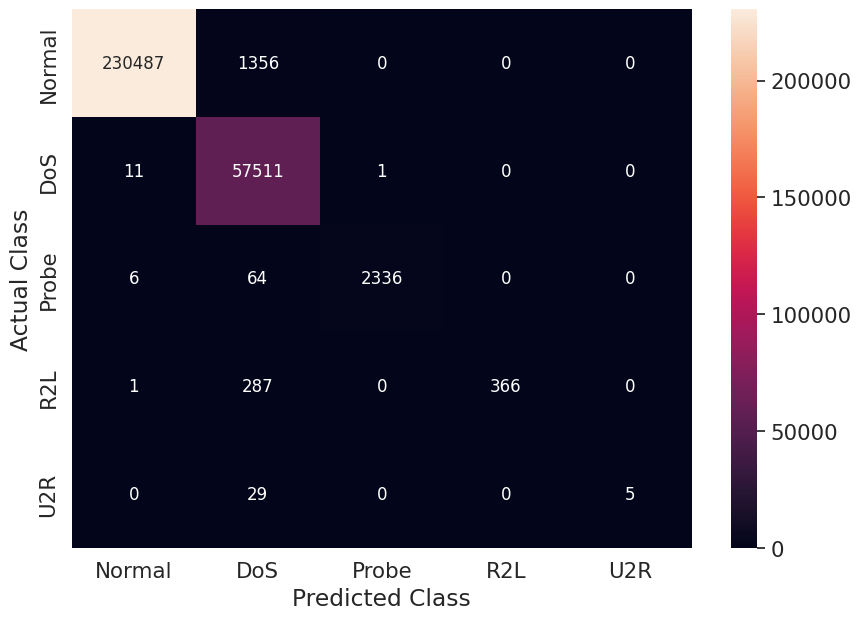

In [ ]:
confusion_matrix_func(y_val_encoded, y_val_pred_rf)

In [ ]:
from sklearn.metrics import *
#fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, pred)
from sklearn import preprocessing
def multiclass_roc_auc_score(y_test, pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    pred = lb.transform(pred)
    return roc_auc_score(y_test, pred, average=average)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

roc_auc_score = multiclass_roc_auc_score(y_val_encoded, y_val_pred_rf)
print('='*50)
print("ROC-AUC score: {}".format(roc_auc_score))

ROC-AUC score: 0.8663850912391281


In [ ]:
# ...

# Valutazione del modello Random Forest
#y_val_pred_rf_prob = random_forest_classifier.predict_proba(y_val_pred_nn)

# Sostituisci y_prob con le probabilità predette dal modello Random Forest
# Esempio di utilizzo:
# plot_multiclass_roc_curve(y_val_encoded, y_val_pred_rf_prob, classes)

# ...
from itertools import cycle
def plot_multiclass_roc_curve(y_true, y_probabilities, classes):
    """
    Plot multiclass ROC curve.

    Parameters:
    - y_true: True labels of the data
    - y_probabilities: Predicted probabilities for each class
    - classes: List of class labels

    Returns:
    - None (displays the plot)
    """

    # Binarize the true labels
    y_true_bin = label_binarize(y_true, classes=classes)

    # Alcuni modelli possono restituire un array 1D invece di 2D, in tal caso, risolvi il problema
    if y_true_bin.ndim == 1:
      y_true_bin = y_true_bin.reshape(-1, 1)

    # Initialize the figure
    plt.figure(figsize=(10, 8))

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_probabilities[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_probabilities.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot ROC curves for each class
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green'])
    for i, color in zip(range(len(classes)), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {classes[i]}')

    # Plot micro-average ROC curve
    plt.plot(fpr["micro"], tpr["micro"],
             label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})',
             color='deeppink', linestyle=':', linewidth=4)

    # Plot random guess line
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    # Set labels and legend
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multiclass ROC Curve')
    plt.legend(loc="lower right")

    # Show the plot
    plt.show()

# Esempio di utilizzo:
# Sostituisci y_val_encoded e y_val_pred_rf_prob con i tuoi valori effettivi e predetti dal Random Forest
# Sostituisci classes con la lista delle tue classi (ad esempio, classes=['A', 'B', 'C', 'D', 'E'])
# plot_multiclass_roc_curve(y_val_encoded, y_val_pred_rf_prob, classes)


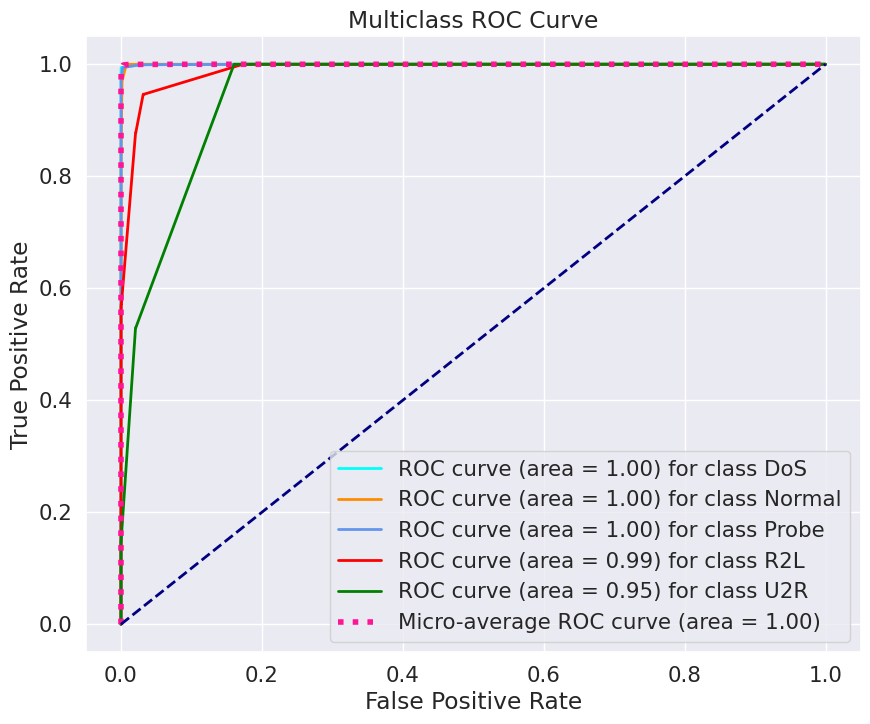

In [ ]:
y_val_pred_rf = random_forest_classifier.predict_proba(y_val_pred_nn)
plot_multiclass_roc_curve(y_val, y_val_pred_rf, classes=['DoS','Normal','Probe','R2L','U2R'])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

def plot_roc_curve_for_class(y_true, y_probabilities, class_index):
    """
    Plot ROC curve for a single class.

    Parameters:
    - y_true: True labels of the data
    - y_probabilities: Predicted probabilities for each class
    - class_index: Index of the class for which to plot the ROC curve

    Returns:
    - None (displays the plot)
    """

    # Binarize the true labels for the specific class
    classes = np.unique(y_true)
    y_true_bin = label_binarize(y_true, classes=classes)

    # Check if class_index is a valid index
    if class_index < 0 or class_index >= len(classes):
        raise ValueError("Invalid class_index. It should be an integer within the range of classes.")

    # Initialize the figure
    plt.figure(figsize=(8, 6))

    # Compute ROC curve and ROC area for the specified class
    fpr, tpr, _ = roc_curve(y_true_bin[:, class_index], y_probabilities[:, class_index])
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f}) for class {classes[class_index]}')

    # Plot random guess line
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    # Set labels and legend
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Class {classes[class_index]}')
    plt.legend(loc="lower right")

    # Show the plot
    plt.show()

# Esempio di utilizzo:
# Sostituisci y_true e y_prob con i tuoi valori effettivi e predetti
# Sostituisci class_index con l'indice della classe che desideri plottare
# plot_roc_curve_for_class(y_true, y_prob, class_index)


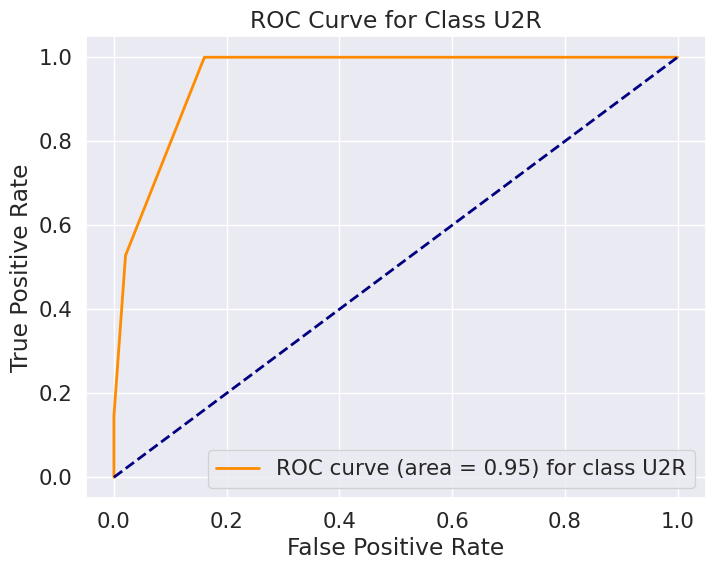

In [ ]:
plot_roc_curve_for_class(y_val, y_val_pred_rf, class_index=4)